In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import shapiro, wilcoxon, friedmanchisquare

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import shapiro, wilcoxon, friedmanchisquare

stat=0.405, p=0.000
Probably not Gaussian
stat=0.775, p=0.000
Probably not Gaussian
stat=0.435, p=0.000
Probably not Gaussian
stat=0.689, p=0.000
Probably not Gaussian
stat=0.677, p=0.000
Probably not Gaussian
stat=0.841, p=0.000
Probably not Gaussian
stat=0.568, p=0.000
Probably not Gaussian
stat=0.798, p=0.000
Probably not Gaussian
stat=0.215, p=0.000
Probably not Gaussian
stat=0.435, p=0.000
Probably not Gaussian
stat=0.332, p=0.000
Probably not Gaussian
stat=0.411, p=0.000
Probably not Gaussian
stat=0.764, p=0.000
Probably not Gaussian
stat=0.618, p=0.000
Probably not Gaussian
stat=0.834, p=0.000
Probably not Gaussian
stat=0.708, p=0.000
Probably not Gaussian
stat=0.838, p=0.000
Probably not Gaussian
stat=0.509, p=0.000
Probably not Gaussian
stat=0.531, p=0.000
Probably not Gaussian
stat=0.505, p=0.000
Probably not Gaussian
stat=0.656, p=0.000
Probably not Gaussian
stat=0.594, p=0.000
Probably not Gaussian
stat=0.534, p=0.000
Probably not Gaussian
stat=0.891, p=0.000
Probably not G

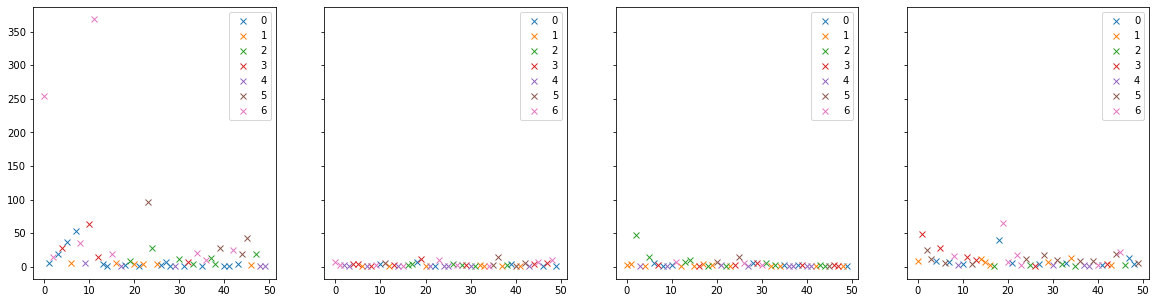

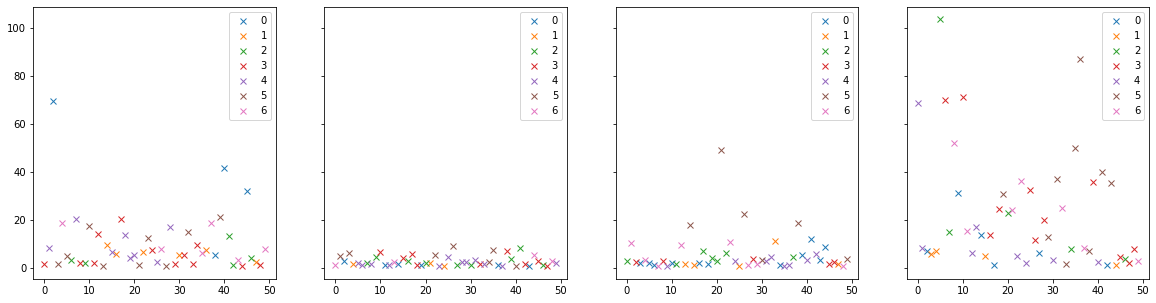

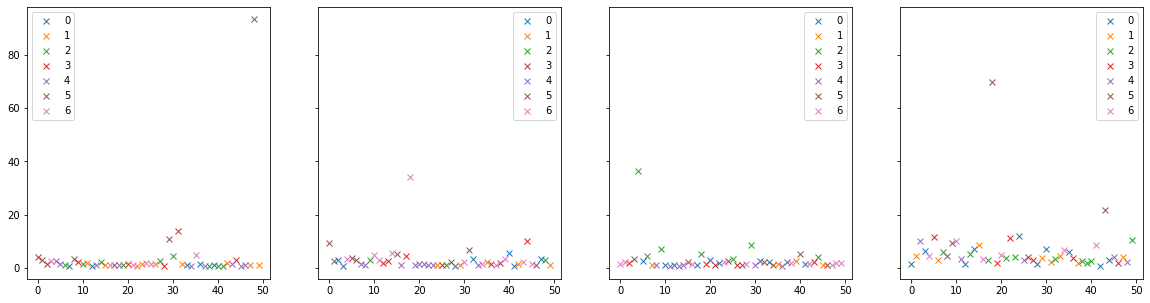

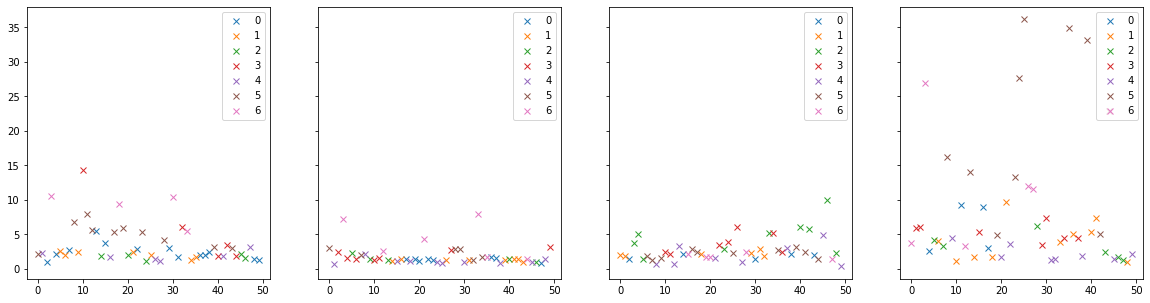

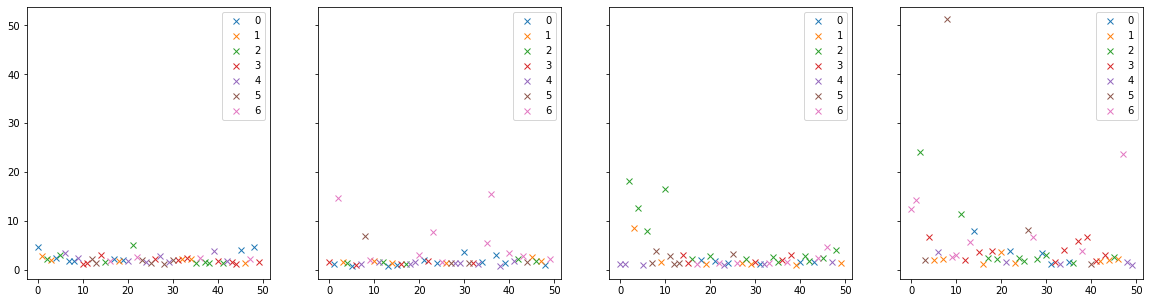

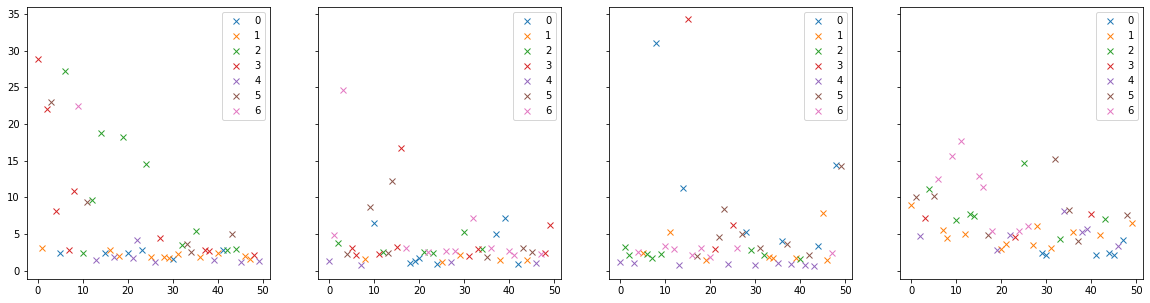

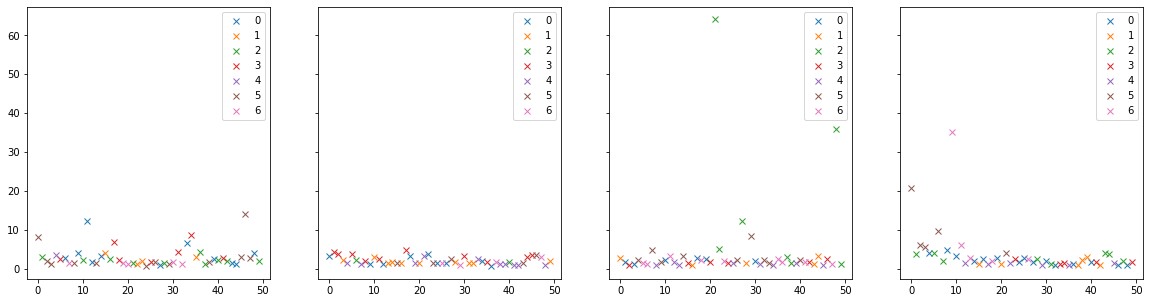

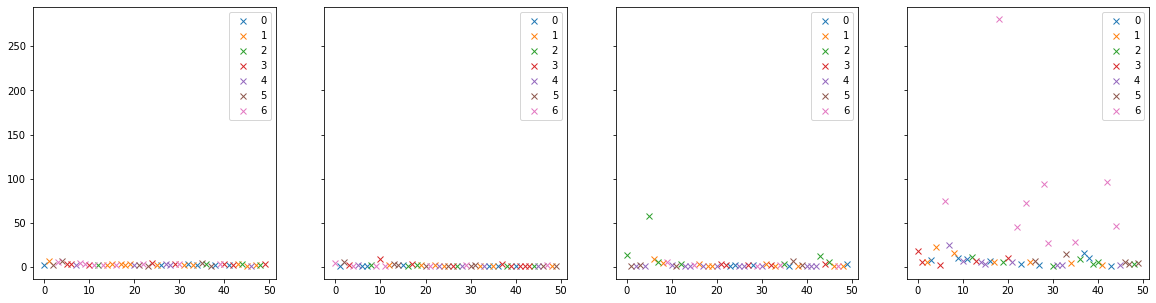

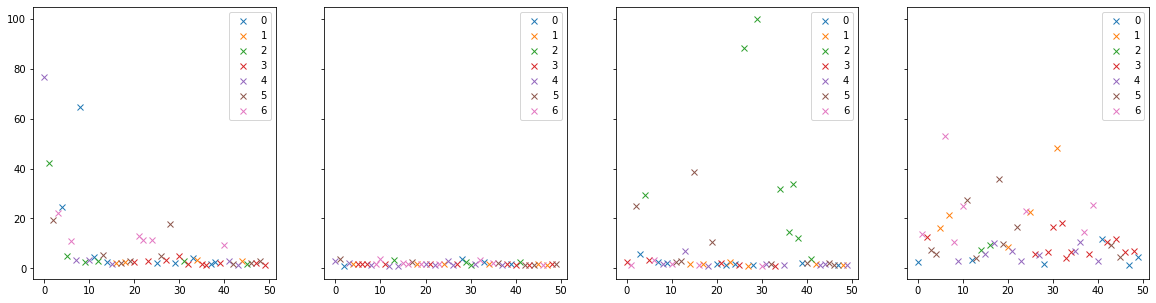

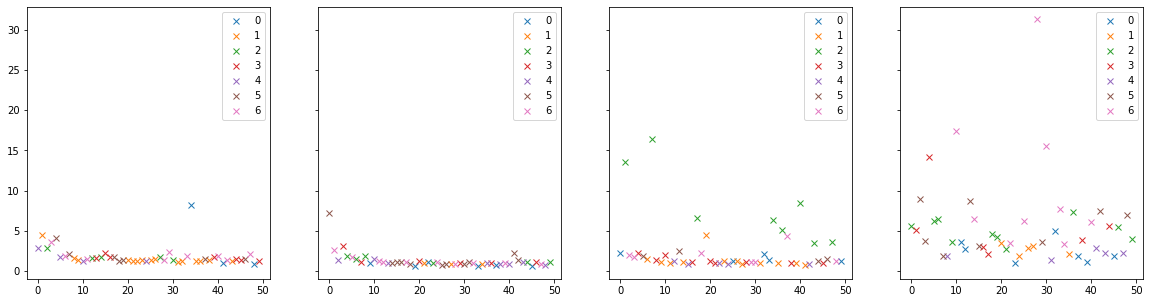

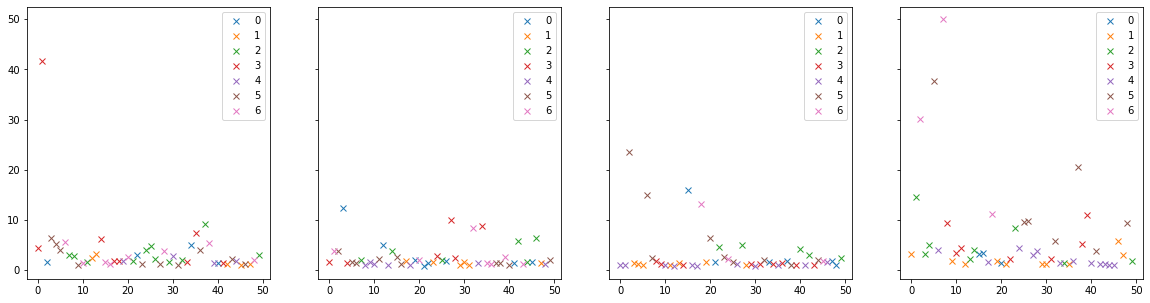

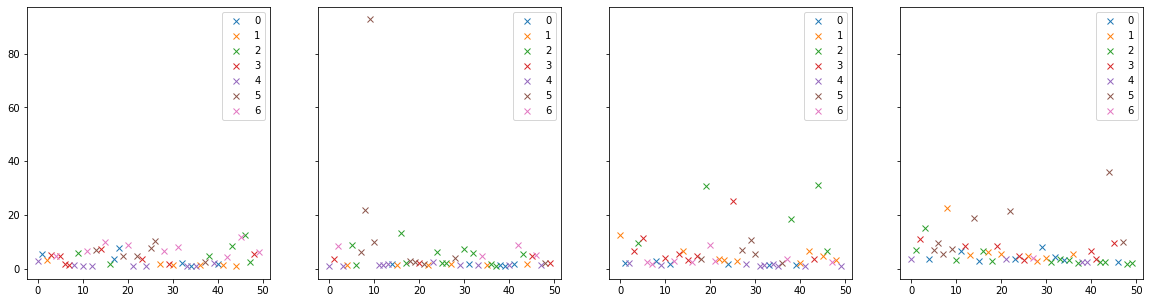

In [2]:
vp_codes = [1234, 1313, 1735, 5724, 7127, 7575, 7660, 7811, 8638, 9436, 9933, 10438]
time_dictionary = {}
time_condition_dictionary = {}
for vp_code in vp_codes:
    block = 1
    fig, ax = plt.subplots(ncols=4, sharey=True)
    fig.set_size_inches(20, 5)

    for block in range(1, 5):
        fn = f'../data/{vp_code}/block_{block}_experiment_data.csv'
        with open(fn) as df:
            raw_data = df.readlines()

        D = pd.DataFrame([line.replace('\t\t\t', '\t').replace('\t\t', '\t').replace('\n', '').split('\t') for line in open(fn)][3:])
        D.columns = ['trial', 'condition', 'time']


        D.loc[:, 'time'] = D.loc[:, 'time'].apply(float)
        D.loc[:, 'trial'] = D.loc[:, 'trial'].apply(int)
        D.loc[:, 'condition'] = D.loc[:, 'condition'].apply(int)
        
        
        key_a = "Time_"+str(vp_code)+"_"+str(block)
        value_a = D.time
        a = {key_a:value_a}
        
        time_dictionary.update(a)
        
        for cond, d in D.groupby('condition'):
            key_b = "Time_"+str(vp_code)+"_"+str(block)+"_"+str(cond)
            value_b = d.time
            b = {key_b:value_b}
            time_condition_dictionary.update(b)
        
        #print ('VP_Code '+str(vp_code)+' Block '+str(block)+' mean = ' + str(np.mean(D.time)))
        #print ('VP_Code '+str(vp_code)+' Block '+str(block)+' var = ' + str(np.var(D.time)))
        #print ('VP_Code '+str(vp_code)+' Block '+str(block)+' std = ' + str(np.std(D.time)))
        data = D.time
        
        
        #https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/
        stat, p = shapiro(data)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Probably Gaussian')
        else:
            print('Probably not Gaussian')
            
            
        #for cond, d in D.groupby('condition'):
            #print('Mean of Condition ' + str(cond) + ' = ' + str(np.mean(d.time)))
        
        
        for cond, d in D.groupby('condition'):
            ax[block-1].plot(d.trial, d.time, 'x', label=cond)
        ax[block-1].legend()
        # ax[block-1].plot(D.trial, D.time, 'x')
        
        
#print(time_dictionary)
#print(time_condition_dictionary)

time_block_1 = []
for vp_code in vp_codes:
    time_block_1.append(time_dictionary["Time_"+str(vp_code)+"_1"])
time_block_2 = []
for vp_code in vp_codes:
    time_block_2.append(time_dictionary["Time_"+str(vp_code)+"_2"])
time_block_3 = []
for vp_code in vp_codes:
    time_block_3.append(time_dictionary["Time_"+str(vp_code)+"_3"])
time_block_4 = []
for vp_code in vp_codes:
    time_block_4.append(time_dictionary["Time_"+str(vp_code)+"_4"])

    
# stat, p = friedmanchisquare(time_block_1, time_block_2, time_block_3, time_block_4)
# print('stat=%.3f, p=%.3f' % (stat, p))
# if p > 0.05:
#     print('Probably the same distribution')
# else:
#     print('Probably different distributions')
# result = scikit_posthocs.posthoc_nemenyi_friedman()

In [3]:
import pyro
from pyro import sample
import pyro.distributions as dist
import torch

In [4]:
def exp_model(t):
    a = sample('a', dist.HalfNormal(1)) # set slope prior
    b = sample('b', dist.HalfNormal(1)) # set scale prior
    c = sample('c', dist.HalfNormal(1)) # set bias prior
    shape = b * torch.exp(-a*t) + c
    rate = sample('sigma', dist.Exponential(1))
    rt = sample('rt', dist.Normal(shape, rate))
    return rt
    #torch.exp(-t)

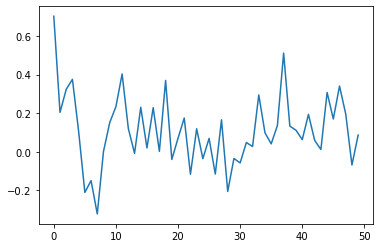

In [5]:
t = torch.tensor(range(50))
rt = exp_model(t)
plt.plot(t, rt)

In [6]:
from pyro.infer import MCMC, NUTS
from pyro import condition

In [7]:
import random

Sample: 100%|█| 3000/3000 [00:54, 55.13it/s, step size=3.18e-01, acc. prob=0.945



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.78      0.62      0.64      0.00      1.69   1041.21      1.00
         b      0.89      0.61      0.77      0.04      1.80   1219.66      1.00
         c      1.03      0.71      0.91      0.00      2.05    597.62      1.00
     sigma     48.44      3.10     48.21     43.37     53.43    827.15      1.00

Number of divergences: 0
1234_1


Sample: 100%|█| 3000/3000 [00:54, 55.00it/s, step size=3.08e-01, acc. prob=0.907



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.77      0.59      0.68      0.00      1.60    620.99      1.00
         b      0.97      0.64      0.87      0.00      1.82    650.02      1.00
         c      2.96      0.50      2.99      2.23      3.75    361.17      1.00
     sigma      3.04      0.30      3.02      2.57      3.55    697.13      1.00

Number of divergences: 0
1234_2


Sample: 100%|█| 3000/3000 [00:52, 57.57it/s, step size=3.66e-01, acc. prob=0.904



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.53      0.54      0.36      0.00      1.31    857.43      1.00
         b      1.15      0.73      1.03      0.01      2.16    611.63      1.00
         c      2.09      0.73      2.08      0.91      3.31    721.33      1.00
     sigma      6.78      0.66      6.74      5.65      7.77    839.65      1.00

Number of divergences: 0
1234_3


Sample: 100%|█| 3000/3000 [00:54, 54.57it/s, step size=2.94e-01, acc. prob=0.867



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.55      0.60      0.33      0.00      1.43    514.53      1.00
         b      1.20      0.79      1.06      0.01      2.31    460.40      1.00
         c      2.37      0.89      2.35      0.85      3.72    543.52      1.00
     sigma     13.24      1.22     13.15     11.08     14.99    565.78      1.00

Number of divergences: 1
1234_4


Sample: 100%|█| 3000/3000 [00:58, 51.69it/s, step size=2.74e-01, acc. prob=0.913



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.64      0.61      0.47      0.00      1.54    743.48      1.00
         b      1.05      0.74      0.90      0.01      2.09    498.21      1.00
         c      2.40      0.88      2.40      0.96      3.82    633.40      1.00
     sigma     12.60      1.14     12.55     10.88     14.55    687.73      1.00

Number of divergences: 0
1313_1


Sample: 100%|█| 3000/3000 [00:45, 65.28it/s, step size=3.77e-01, acc. prob=0.794



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.66      0.61      0.52      0.00      1.53    192.75      1.00
         b      0.87      0.63      0.75      0.00      1.84     82.80      1.00
         c      2.40      0.54      2.51      1.55      3.23     34.82      1.02
     sigma      2.18      0.22      2.16      1.81      2.52    590.22      1.00

Number of divergences: 34
1313_2


Sample: 100%|█| 3000/3000 [00:49, 60.23it/s, step size=3.92e-01, acc. prob=0.806



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.67      0.60      0.55      0.00      1.50    539.08      1.00
         b      0.95      0.71      0.79      0.01      1.93    545.28      1.00
         c      2.33      0.79      2.34      1.11      3.79    318.92      1.00
     sigma      8.00      0.75      7.96      6.77      9.15    673.03      1.00

Number of divergences: 1
1313_3


Sample: 100%|█| 3000/3000 [00:49, 60.31it/s, step size=3.36e-01, acc. prob=0.894



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.74      0.61      0.61      0.00      1.59    817.09      1.00
         b      0.91      0.68      0.78      0.00      1.86    552.15      1.00
         c      1.66      0.89      1.62      0.12      2.88    893.78      1.00
     sigma     25.83      2.10     25.69     22.24     28.94    818.49      1.00

Number of divergences: 0
1313_4


Sample: 100%|█| 3000/3000 [00:49, 60.10it/s, step size=3.49e-01, acc. prob=0.926



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.78      0.60      0.64      0.00      1.60   1085.86      1.00
         b      0.81      0.64      0.68      0.00      1.73    998.97      1.00
         c      1.23      0.68      1.18      0.06      2.19    931.47      1.00
     sigma     12.11      1.04     12.02     10.59     13.89    740.60      1.00

Number of divergences: 0
1735_1


Sample: 100%|█| 3000/3000 [00:48, 62.00it/s, step size=3.07e-01, acc. prob=0.891



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.78      0.62      0.66      0.00      1.65    841.23      1.00
         b      0.95      0.67      0.86      0.02      1.92    794.16      1.00
         c      2.15      0.61      2.17      1.16      3.14    794.44      1.00
     sigma      4.84      0.47      4.80      4.08      5.59    653.33      1.00

Number of divergences: 0
1735_2


Sample: 100%|█| 3000/3000 [00:47, 63.47it/s, step size=3.89e-01, acc. prob=0.857



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.63      0.60      0.43      0.00      1.57   1062.04      1.00
         b      0.94      0.68      0.80      0.01      1.90    646.91      1.00
         c      1.87      0.57      1.86      1.02      2.88    810.78      1.00
     sigma      4.96      0.47      4.93      4.23      5.71    828.60      1.00

Number of divergences: 0
1735_3


Sample: 100%|█| 3000/3000 [00:55, 54.31it/s, step size=3.02e-01, acc. prob=0.887



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.66      0.61      0.53      0.00      1.51    478.64      1.00
         b      0.94      0.71      0.76      0.00      1.95    436.04      1.00
         c      2.17      0.81      2.13      0.98      3.58   1079.34      1.00
     sigma      9.90      0.94      9.83      8.39     11.47    524.63      1.00

Number of divergences: 0
1735_4


Sample: 100%|█| 3000/3000 [01:07, 44.76it/s, step size=2.19e-01, acc. prob=0.863



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.40      0.54      0.10      0.00      1.20    277.47      1.00
         b      1.22      0.80      1.14      0.01      2.35    189.43      1.01
         c      2.60      0.69      2.70      1.51      3.73    184.97      1.00
     sigma      2.84      0.30      2.82      2.42      3.34    496.49      1.00

Number of divergences: 4
5724_1


Sample: 100%|█| 3000/3000 [00:57, 52.38it/s, step size=2.69e-01, acc. prob=0.936



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.62      0.59      0.43      0.00      1.52    809.23      1.00
         b      0.86      0.55      0.79      0.00      1.62    438.37      1.00
         c      1.69      0.28      1.72      1.33      2.14    192.44      1.00
     sigma      1.38      0.14      1.37      1.17      1.63    893.51      1.00

Number of divergences: 4
5724_2


Sample: 100%|█| 3000/3000 [00:46, 65.06it/s, step size=4.01e-01, acc. prob=0.919



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.85      0.59      0.75      0.00      1.72    843.34      1.00
         b      0.57      0.46      0.47      0.00      1.16   1253.66      1.00
         c      2.56      0.26      2.57      2.18      3.00    709.45      1.00
     sigma      1.77      0.18      1.76      1.49      2.05   1236.08      1.00

Number of divergences: 3
5724_3


Sample: 100%|█| 3000/3000 [00:55, 53.61it/s, step size=3.00e-01, acc. prob=0.816



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.55      0.61      0.33      0.00      1.46    295.87      1.00
         b      1.19      0.91      0.99      0.00      2.50    241.45      1.00
         c      2.63      0.90      2.62      1.22      4.16    336.22      1.00
     sigma      9.64      0.98      9.55      8.04     11.18    400.53      1.00

Number of divergences: 1
5724_4


Sample: 100%|█| 3000/3000 [00:42, 70.18it/s, step size=5.75e-01, acc. prob=0.849



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.90      0.58      0.79      0.01      1.71    840.67      1.00
         b      1.36      0.62      1.34      0.32      2.30    857.57      1.00
         c      2.15      0.15      2.15      1.94      2.37    344.02      1.00
     sigma      0.89      0.10      0.89      0.75      1.06    751.11      1.00

Number of divergences: 2
7127_1


Sample: 100%|█| 3000/3000 [00:43, 68.78it/s, step size=4.22e-01, acc. prob=0.879



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.69      0.59      0.53      0.00      1.54    663.41      1.00
         b      0.85      0.61      0.73      0.01      1.75    869.39      1.00
         c      2.06      0.44      2.09      1.38      2.75    364.04      1.00
     sigma      2.94      0.31      2.91      2.39      3.36   1030.41      1.00

Number of divergences: 4
7127_2


Sample: 100%|█| 3000/3000 [00:58, 51.14it/s, step size=2.64e-01, acc. prob=0.925



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.34      0.48      0.13      0.00      1.03    496.25      1.00
         b      1.50      0.88      1.42      0.01      2.71    378.16      1.00
         c      2.10      0.56      2.13      1.22      3.04    386.46      1.00
     sigma      3.53      0.35      3.50      2.99      4.14    630.18      1.00

Number of divergences: 0
7127_3


Sample: 100%|█| 3000/3000 [00:51, 57.70it/s, step size=3.34e-01, acc. prob=0.852



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.56      0.62      0.33      0.00      1.48    594.67      1.00
         b      1.14      0.78      1.00      0.04      2.27    574.72      1.00
         c      2.22      0.83      2.22      0.82      3.58    370.70      1.00
     sigma      8.21      0.83      8.16      7.03      9.63    504.07      1.00

Number of divergences: 0
7127_4


Sample: 100%|█| 3000/3000 [00:57, 52.53it/s, step size=2.54e-01, acc. prob=0.912



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.36      0.54      0.10      0.00      1.15    472.49      1.01
         b      1.71      0.96      1.64      0.07      3.04    521.02      1.01
         c      2.54      0.92      2.59      0.99      4.01    346.11      1.00
     sigma      7.45      0.85      7.37      6.07      8.71    421.33      1.00

Number of divergences: 0
7575_1


Sample: 100%|█| 3000/3000 [00:59, 50.45it/s, step size=2.23e-01, acc. prob=0.850



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.49      0.55      0.28      0.00      1.29    404.04      1.00
         b      1.10      0.74      0.97      0.00      2.17    482.05      1.00
         c      2.53      0.61      2.55      1.50      3.49    412.73      1.00
     sigma      4.20      0.43      4.16      3.52      4.87    467.82      1.00

Number of divergences: 1
7575_2


Sample: 100%|█| 3000/3000 [00:50, 59.24it/s, step size=3.51e-01, acc. prob=0.788



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.66      0.63      0.48      0.00      1.56    436.33      1.00
         b      0.91      0.68      0.77      0.01      1.89    509.71      1.00
         c      2.36      0.73      2.37      1.22      3.58    956.41      1.00
     sigma      6.59      0.64      6.54      5.61      7.64    555.70      1.00

Number of divergences: 1
7575_3


Sample: 100%|█| 3000/3000 [01:00, 49.87it/s, step size=2.99e-01, acc. prob=0.923



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.03      0.13      0.01      0.00      0.04    564.74      1.00
         b      2.94      0.85      2.95      1.53      4.31    682.14      1.01
         c      3.55      0.82      3.56      2.35      5.03    680.50      1.00
     sigma      3.75      0.39      3.72      3.12      4.35    548.96      1.00

Number of divergences: 0
7575_4


Sample: 100%|█| 3000/3000 [00:58, 51.00it/s, step size=2.27e-01, acc. prob=0.950



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.79      0.59      0.71      0.00      1.63    554.48      1.00
         b      1.05      0.68      0.97      0.00      1.97    805.78      1.00
         c      2.56      0.43      2.59      1.83      3.19    413.75      1.00
     sigma      2.72      0.29      2.69      2.24      3.18    583.83      1.00

Number of divergences: 1
7660_1


Sample: 100%|█| 3000/3000 [00:39, 76.08it/s, step size=5.00e-01, acc. prob=0.831



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.45      0.42      0.33      0.01      0.95    644.47      1.00
         b      1.31      0.55      1.29      0.46      2.28    904.66      1.00
         c      1.92      0.21      1.94      1.62      2.27    234.70      1.00
     sigma      0.98      0.10      0.97      0.82      1.15    991.22      1.00

Number of divergences: 4
7660_2


Sample: 100%|█| 3000/3000 [00:56, 53.07it/s, step size=2.76e-01, acc. prob=0.942



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.74      0.60      0.61      0.00      1.57   1085.75      1.00
         b      0.83      0.62      0.72      0.00      1.70    673.25      1.00
         c      1.45      0.77      1.43      0.19      2.64    535.60      1.00
     sigma      9.71      0.89      9.66      8.37     11.23    701.55      1.00

Number of divergences: 0
7660_3


Sample: 100%|█| 3000/3000 [00:53, 56.60it/s, step size=2.97e-01, acc. prob=0.934



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.63      0.58      0.45      0.00      1.51    652.24      1.01
         b      1.27      0.81      1.19      0.00      2.36    574.65      1.00
         c      2.12      0.63      2.14      1.14      3.14    445.75      1.00
     sigma      5.36      0.54      5.32      4.50      6.27    581.72      1.00

Number of divergences: 0
7660_4


Sample: 100%|█| 3000/3000 [01:05, 45.85it/s, step size=2.56e-01, acc. prob=0.834



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.18      0.25      0.12      0.01      0.34    368.32      1.00
         b      1.61      0.63      1.64      0.50      2.65    322.29      1.00
         c      2.57      0.36      2.65      2.05      3.16    129.11      1.01
     sigma      1.17      0.12      1.16      0.98      1.36    558.35      1.00

Number of divergences: 4
7811_1


Sample: 100%|█| 3000/3000 [01:13, 40.88it/s, step size=2.34e-01, acc. prob=0.915



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.34      0.47      0.12      0.00      1.01    470.72      1.00
         b      1.59      0.60      1.61      0.64      2.62    393.24      1.01
         c      1.56      0.37      1.63      0.99      2.16    237.80      1.00
     sigma      1.25      0.13      1.24      1.03      1.44    700.27      1.00

Number of divergences: 0
7811_2


Sample: 100%|█| 3000/3000 [00:49, 60.62it/s, step size=3.76e-01, acc. prob=0.875



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.69      0.62      0.52      0.00      1.59    780.94      1.00
         b      1.02      0.70      0.90      0.02      1.97    766.42      1.00
         c      1.70      0.71      1.67      0.48      2.78   1007.19      1.00
     sigma      7.96      0.70      7.91      6.86      9.08    796.22      1.01

Number of divergences: 0
7811_3


Sample: 100%|█| 3000/3000 [00:55, 54.14it/s, step size=2.76e-01, acc. prob=0.929



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.77      0.60      0.67      0.00      1.62    876.64      1.00
         b      0.79      0.60      0.67      0.00      1.62    839.47      1.00
         c      1.14      0.75      1.06      0.00      2.17    890.06      1.00
     sigma     36.79      2.69     36.80     32.06     40.99    545.39      1.00

Number of divergences: 0
7811_4


Sample: 100%|█| 3000/3000 [00:53, 56.21it/s, step size=3.22e-01, acc. prob=0.933



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.64      0.62      0.46      0.00      1.50    806.66      1.00
         b      1.08      0.75      0.96      0.00      2.18    462.92      1.00
         c      1.77      0.81      1.76      0.53      3.14    534.19      1.00
     sigma     14.53      1.23     14.47     12.52     16.52    833.68      1.00

Number of divergences: 0
8638_1


Sample: 100%|█| 3000/3000 [00:47, 63.15it/s, step size=3.65e-01, acc. prob=0.835



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.80      0.53      0.70      0.00      1.53    580.33      1.00
         b      0.90      0.47      0.86      0.11      1.60    729.79      1.00
         c      1.86      0.11      1.87      1.68      2.03    368.18      1.01
     sigma      0.68      0.07      0.68      0.57      0.79    597.65      1.00

Number of divergences: 2
8638_2


Sample: 100%|█| 3000/3000 [00:53, 55.70it/s, step size=2.88e-01, acc. prob=0.923



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.74      0.65      0.56      0.00      1.68   1105.10      1.00
         b      0.86      0.62      0.77      0.00      1.73    825.18      1.01
         c      1.40      0.78      1.36      0.16      2.57    964.99      1.00
     sigma     18.48      1.55     18.36     16.07     21.18    525.01      1.00

Number of divergences: 0
8638_3


Sample: 100%|█| 3000/3000 [01:00, 49.40it/s, step size=2.52e-01, acc. prob=0.894



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.45      0.59      0.17      0.00      1.37    326.58      1.00
         b      1.41      1.00      1.23      0.01      2.87    245.75      1.00
         c      2.77      0.95      2.73      1.10      4.24    488.20      1.00
     sigma     12.68      1.24     12.59     10.66     14.68    483.35      1.00

Number of divergences: 0
8638_4


Sample: 100%|█| 3000/3000 [00:45, 65.50it/s, step size=4.29e-01, acc. prob=0.897



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.35      0.33      0.25      0.02      0.72    793.27      1.00
         b      1.50      0.61      1.46      0.51      2.54    784.73      1.01
         c      1.64      0.20      1.65      1.33      1.97    558.86      1.00
     sigma      1.11      0.12      1.10      0.92      1.30   1099.44      1.00

Number of divergences: 0
9436_1


Sample: 100%|█| 3000/3000 [00:36, 81.64it/s, step size=4.95e-01, acc. prob=0.929



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.85      0.28      0.81      0.40      1.23    847.96      1.00
         b      4.79      0.53      4.83      3.94      5.62    681.00      1.00
         c      1.11      0.07      1.11      0.98      1.23   1294.86      1.00
     sigma      0.47      0.06      0.46      0.38      0.55    819.21      1.00

Number of divergences: 0
9436_2


Sample: 100%|█| 3000/3000 [01:02, 48.31it/s, step size=3.48e-01, acc. prob=0.927



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.54      0.53      0.36      0.00      1.26    512.61      1.00
         b      1.12      0.69      1.04      0.01      2.10    659.00      1.00
         c      2.00      0.43      2.02      1.31      2.71    430.75      1.01
     sigma      3.02      0.31      2.98      2.53      3.49    795.84      1.00

Number of divergences: 0
9436_3


Sample: 100%|█| 3000/3000 [01:06, 44.93it/s, step size=2.22e-01, acc. prob=0.915



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.47      0.60      0.22      0.00      1.37    425.94      1.00
         b      1.32      0.93      1.15      0.02      2.64    247.93      1.01
         c      3.03      0.88      3.13      1.47      4.37    274.92      1.01
     sigma      5.21      0.55      5.17      4.28      6.03    530.33      1.00

Number of divergences: 0
9436_4


Sample: 100%|█| 3000/3000 [00:57, 52.46it/s, step size=3.00e-01, acc. prob=0.950



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.56      0.52      0.39      0.00      1.31   1136.51      1.00
         b      1.26      0.77      1.19      0.03      2.34    895.15      1.00
         c      2.07      0.68      2.10      0.89      3.10    577.21      1.00
     sigma      5.64      0.56      5.62      4.78      6.55    735.51      1.00

Number of divergences: 0
9933_1


Sample: 100%|█| 3000/3000 [00:44, 67.90it/s, step size=3.97e-01, acc. prob=0.850



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.66      0.59      0.48      0.00      1.51    811.17      1.00
         b      0.84      0.65      0.72      0.00      1.74    639.31      1.00
         c      2.20      0.40      2.22      1.54      2.85    454.08      1.01
     sigma      2.53      0.23      2.51      2.14      2.89    961.05      1.00

Number of divergences: 2
9933_2


Sample: 100%|█| 3000/3000 [00:50, 59.75it/s, step size=3.38e-01, acc. prob=0.886



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.55      0.55      0.38      0.00      1.36    653.94      1.01
         b      1.00      0.72      0.89      0.00      2.03    356.86      1.00
         c      1.95      0.58      1.99      1.06      2.96    665.10      1.00
     sigma      4.37      0.43      4.35      3.69      5.04    700.49      1.01

Number of divergences: 0
9933_3


Sample: 100%|█| 3000/3000 [00:55, 54.49it/s, step size=2.79e-01, acc. prob=0.932



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.59      0.60      0.38      0.00      1.50    875.76      1.00
         b      1.06      0.76      0.93      0.00      2.09    716.92      1.00
         c      2.29      0.79      2.28      1.00      3.55    911.08      1.00
     sigma      9.50      0.94      9.42      8.03     10.97    574.67      1.00

Number of divergences: 0
9933_4


Sample: 100%|█| 3000/3000 [01:02, 47.79it/s, step size=2.50e-01, acc. prob=0.889



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.57      0.62      0.38      0.00      1.47    358.79      1.00
         b      1.02      0.78      0.84      0.02      2.16    174.70      1.01
         c      3.20      0.74      3.37      1.89      4.22    178.64      1.00
     sigma      3.20      0.34      3.16      2.65      3.73    495.47      1.00

Number of divergences: 0
10438_1


Sample: 100%|█| 3000/3000 [00:55, 54.43it/s, step size=3.11e-01, acc. prob=0.929



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.71      0.60      0.58      0.00      1.57    790.26      1.00
         b      0.86      0.62      0.73      0.00      1.72    795.45      1.00
         c      1.46      0.80      1.39      0.13      2.63    878.71      1.00
     sigma     12.35      1.07     12.28     10.66     14.10    701.93      1.00

Number of divergences: 0
10438_2


Sample: 100%|█| 3000/3000 [00:58, 51.02it/s, step size=3.04e-01, acc. prob=0.874



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.60      0.62      0.44      0.00      1.52    486.67      1.00
         b      1.06      0.77      0.93      0.00      2.17    324.51      1.00
         c      2.67      0.77      2.70      1.45      3.91    324.29      1.00
     sigma      7.10      0.72      7.02      5.96      8.26    466.81      1.00

Number of divergences: 0
10438_3


Sample: 100%|█| 3000/3000 [01:03, 46.98it/s, step size=2.57e-01, acc. prob=0.885



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a      0.33      0.51      0.05      0.00      1.06    298.66      1.01
         b      1.63      0.98      1.53      0.07      3.01    201.94      1.01
         c      3.05      0.87      3.08      1.57      4.35    280.10      1.02
     sigma      6.52      0.69      6.49      5.47      7.66    649.16      1.00

Number of divergences: 2
10438_4


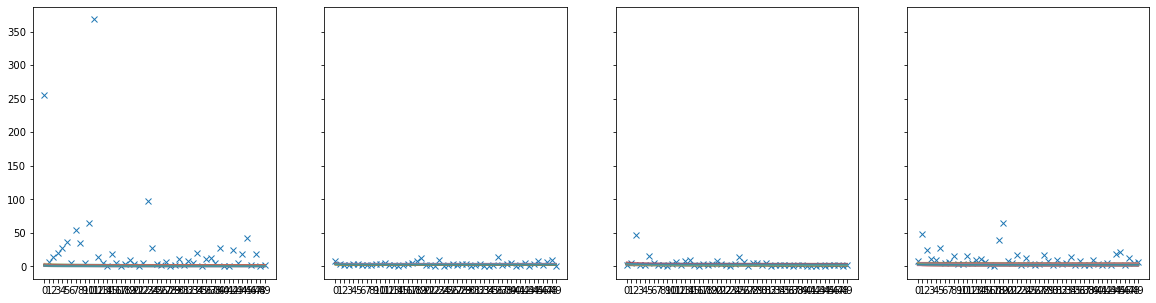

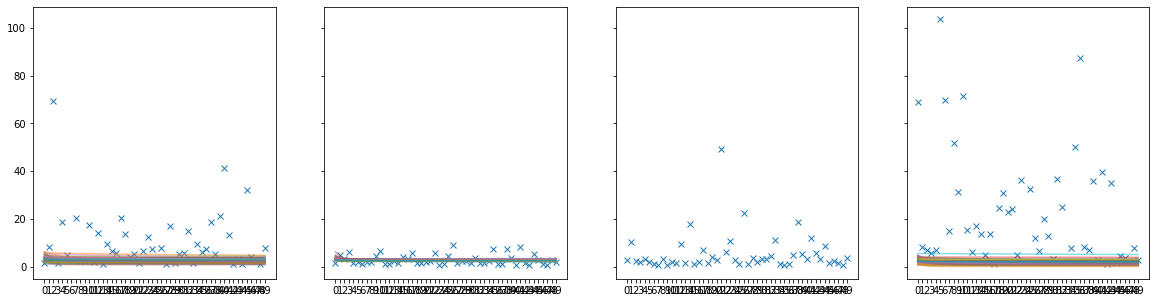

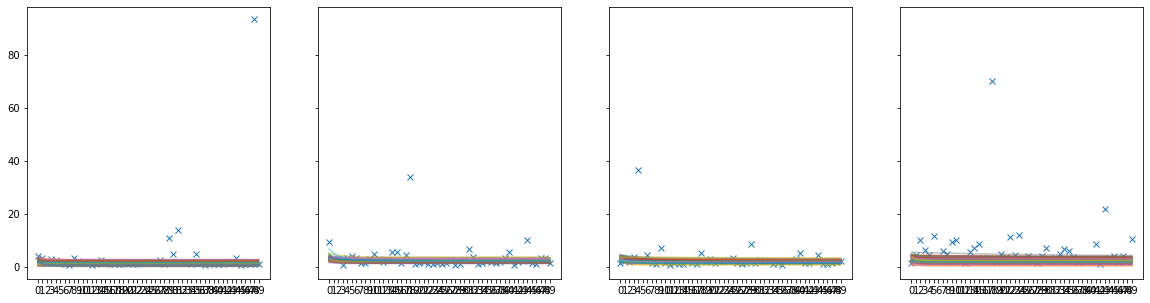

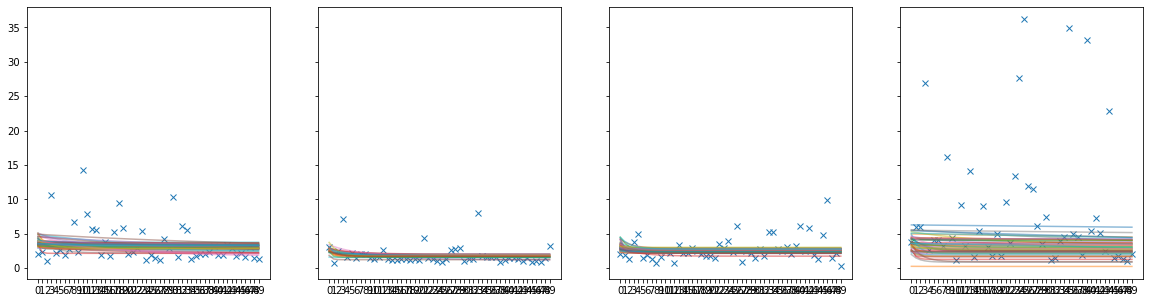

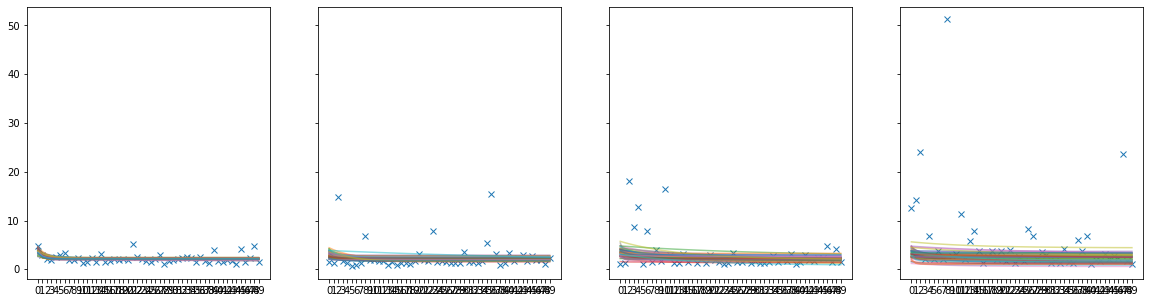

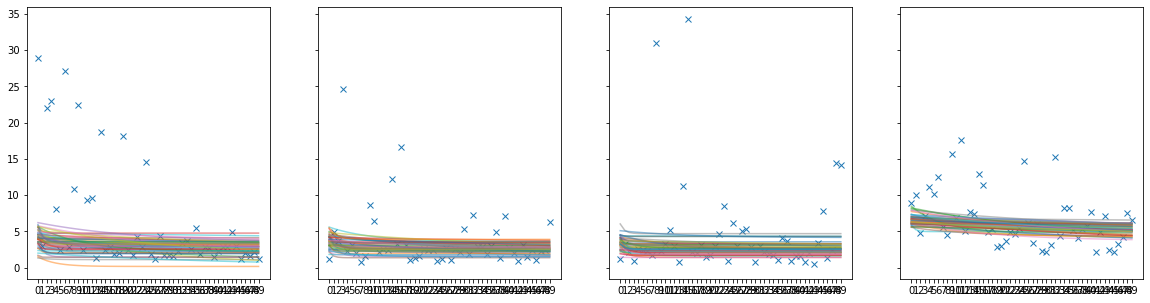

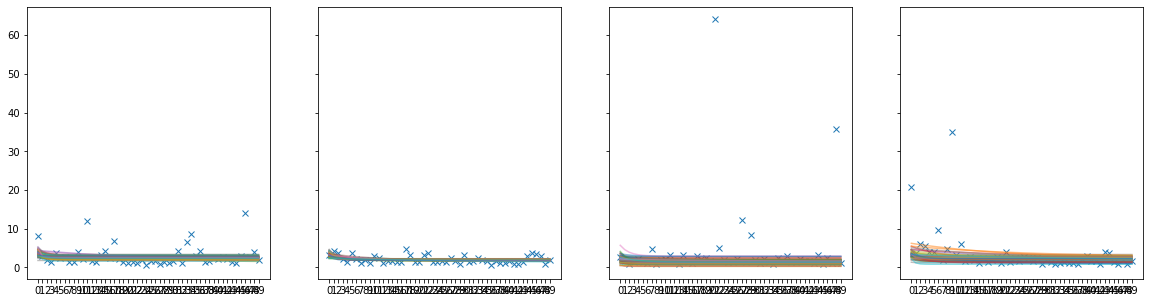

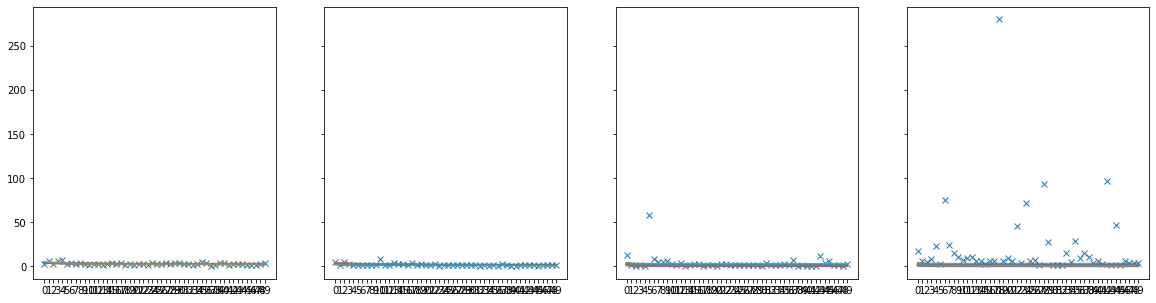

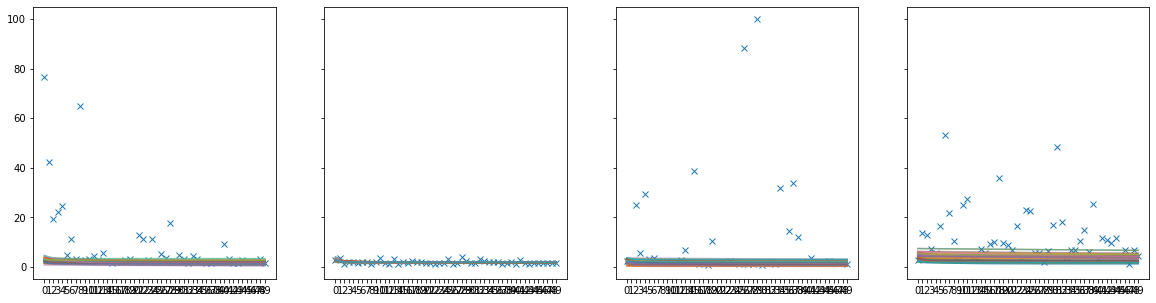

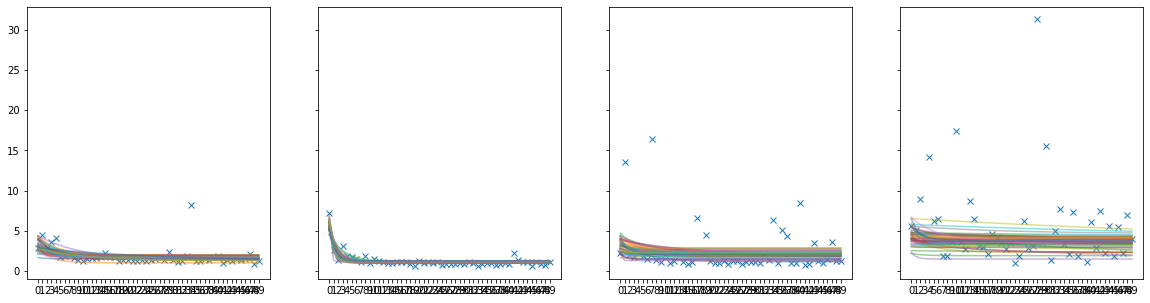

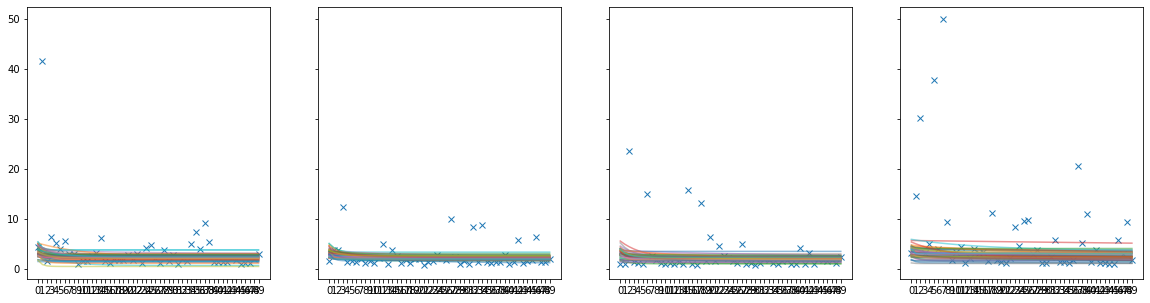

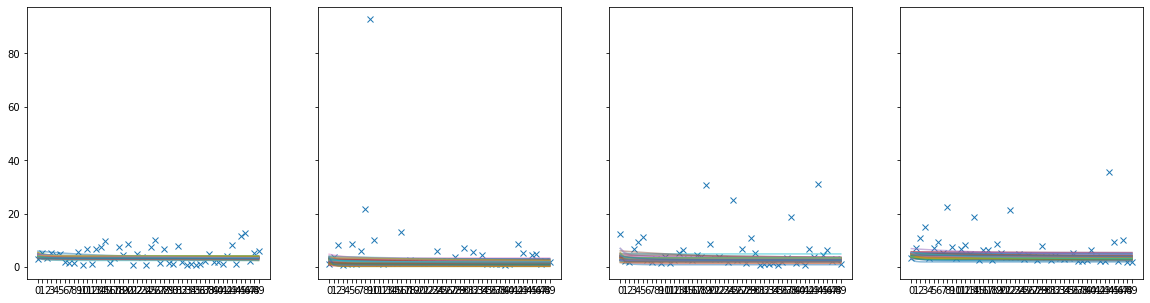

In [8]:
all_samples = {}
for vp_code in vp_codes:
    fig, ax = plt.subplots(ncols=4, sharey=True)
    fig.set_size_inches(20, 5)
    for block in range(1, 5):
        fn = f'../data/{vp_code}/block_{block}_experiment_data.csv'
        with open(fn) as df:
            raw_data = df.readlines()

        D = pd.DataFrame([line.replace('\t\t\t', '\t').replace('\t\t', '\t').replace('\n', '').split('\t') for line in open(fn)][3:])
        D.columns = ['trial', 'condition', 'time']

        D.loc[:, 'time'] = D.loc[:, 'time'].apply(float)

        ax[block-1].plot(D.trial, D.time, 'x')

        exp_conditioned = condition(exp_model, data={'rt': torch.tensor(D.time)})
        kernel = NUTS(exp_conditioned)
        n_samples = 1500
        mcmc = MCMC(kernel, num_samples=n_samples)
        mcmc.run(torch.arange(50))
        samples = mcmc.get_samples()
        all_samples[f"{vp_code}_{block}"] = samples
        mcmc.summary()
        print(f"{vp_code}_{block}")
        try:
            for i in range(50):
                r = random.randint(0, 1500)
                a = samples['a'][r]
                b = samples['b'][r]
                c = samples['c'][r]
                s = samples['sigma'][r]
                ax[block-1].plot(range(50), b*torch.exp(-a*torch.arange(50))+c, alpha=0.5)
        except IndexError:
            continue

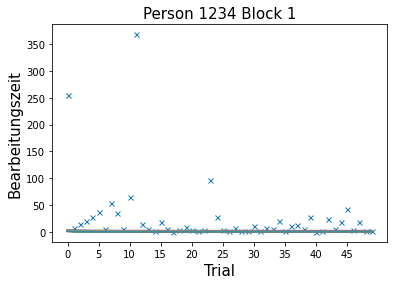

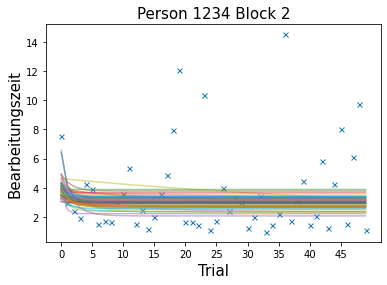

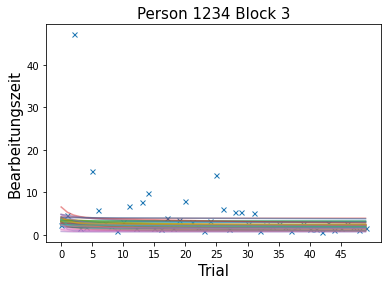

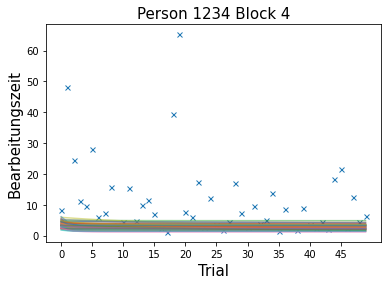

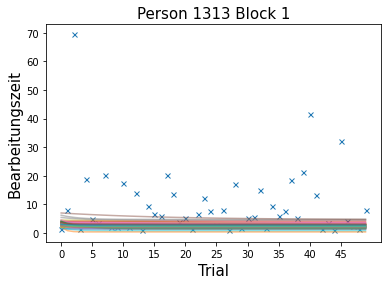

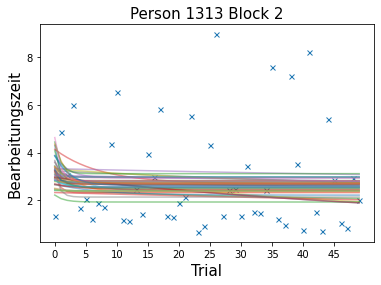

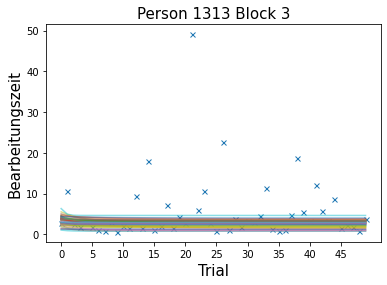

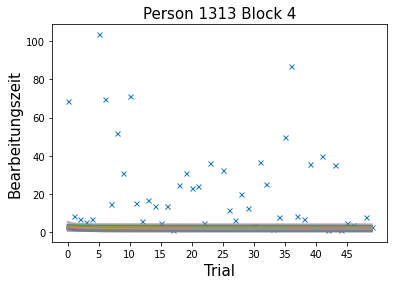

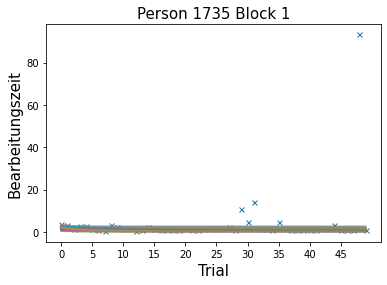

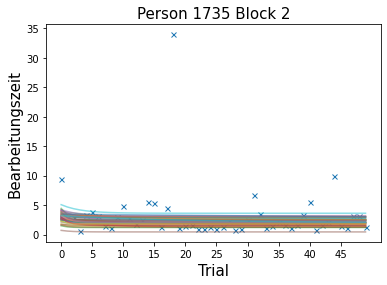

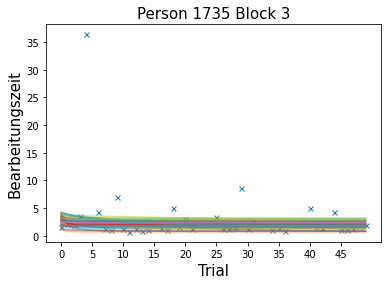

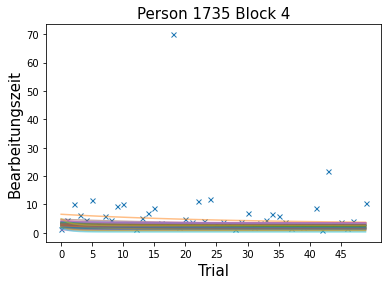

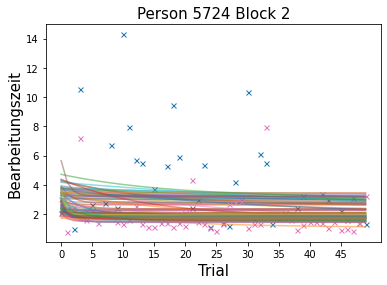

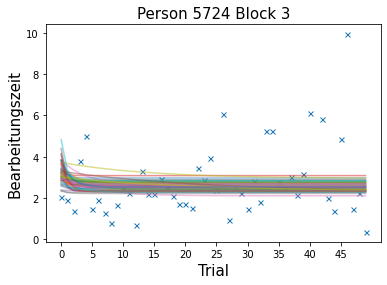

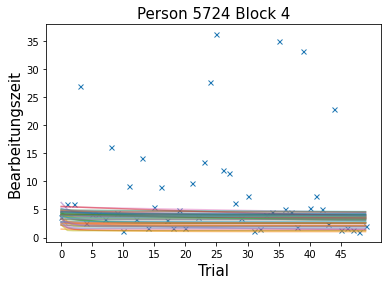

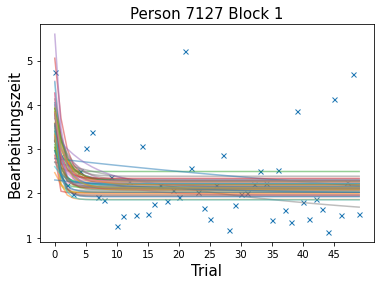

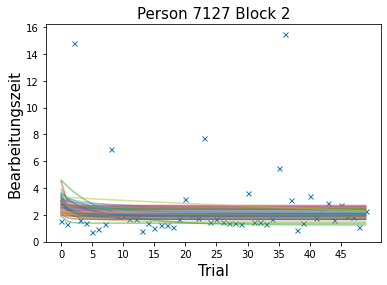

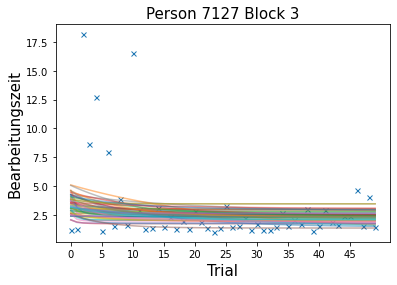

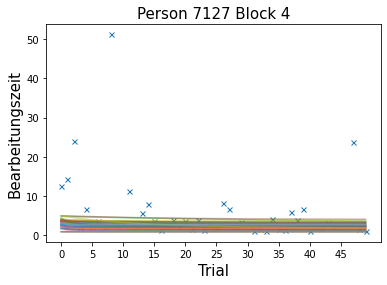

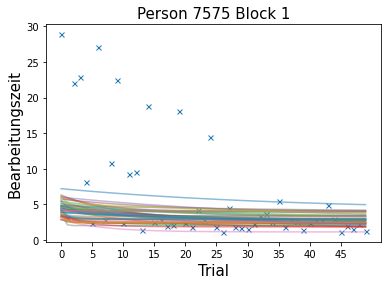

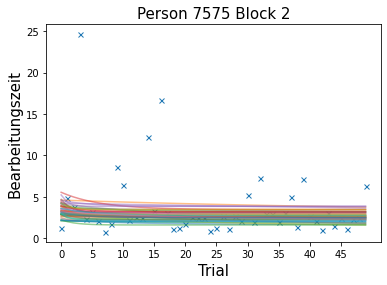

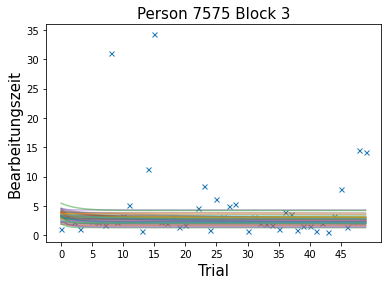

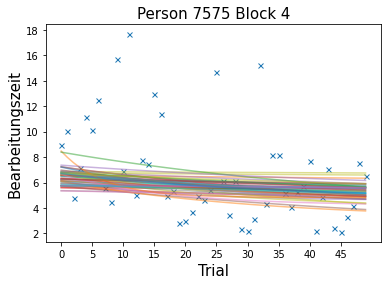

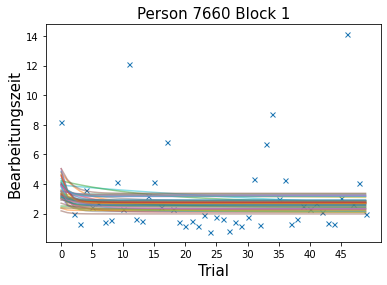

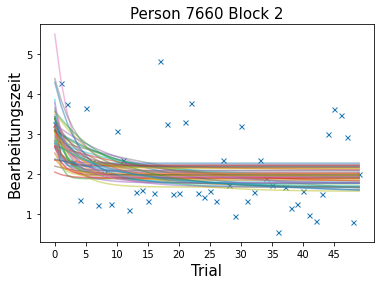

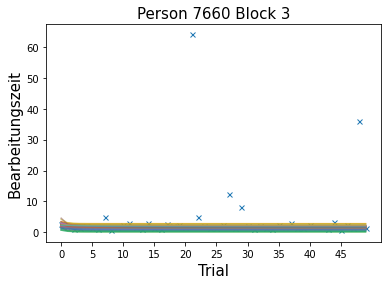

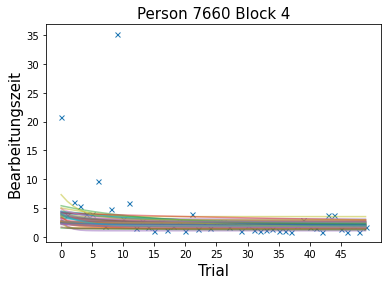

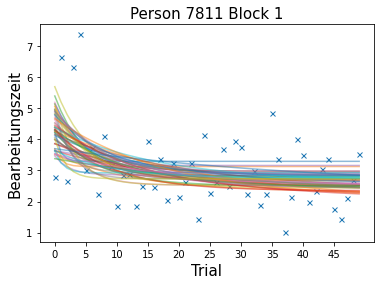

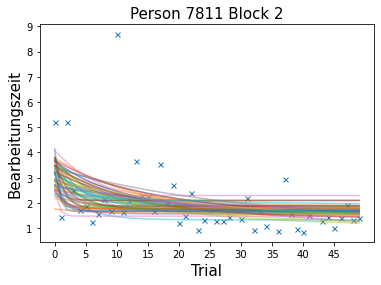

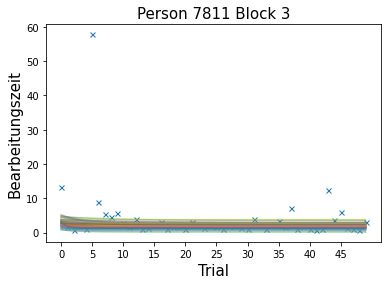

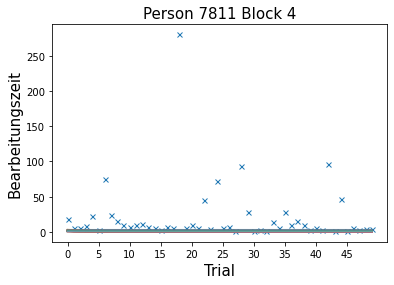

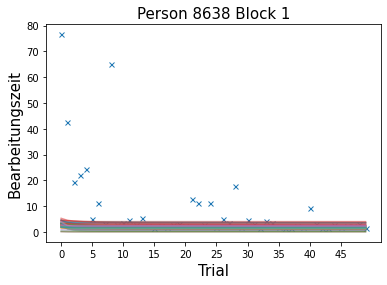

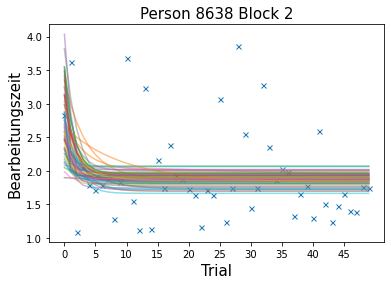

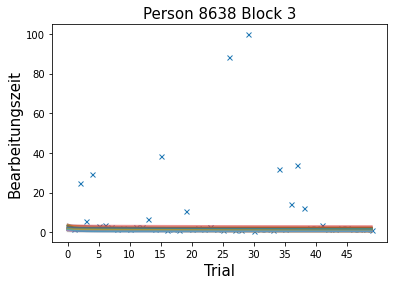

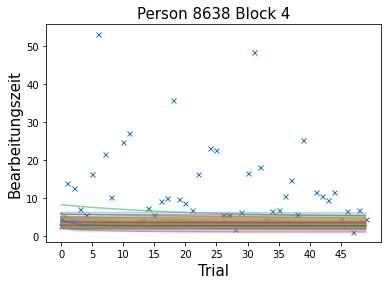

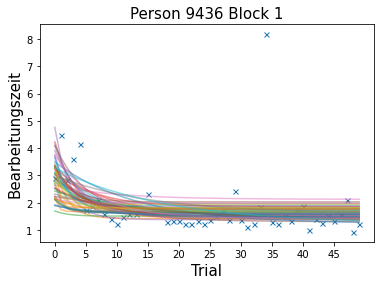

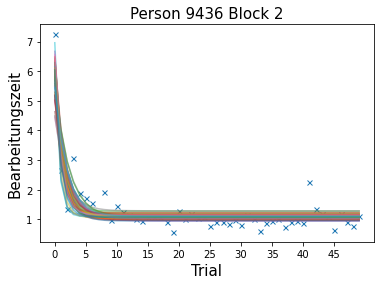

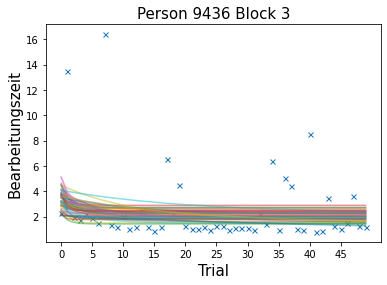

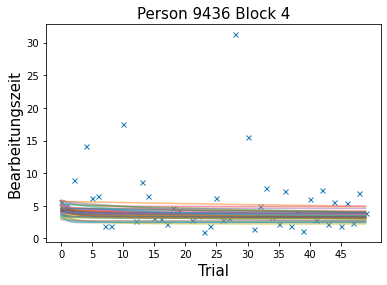

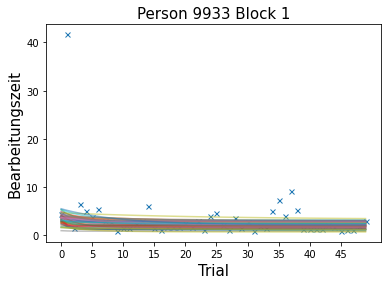

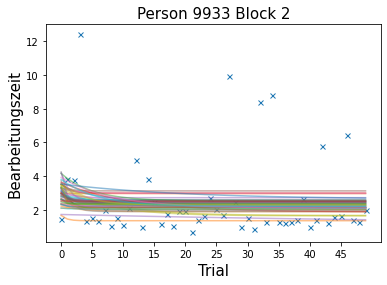

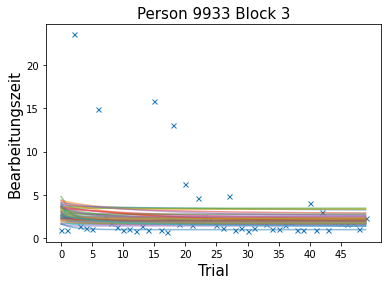

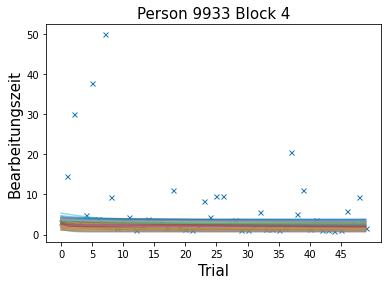

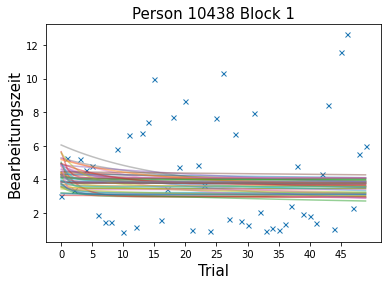

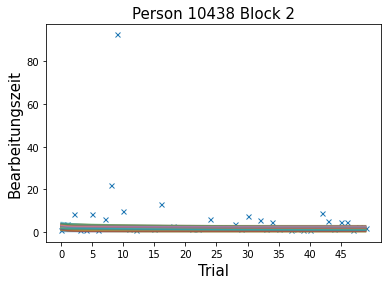

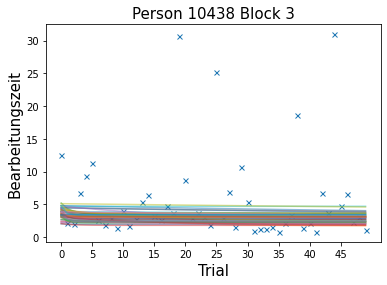

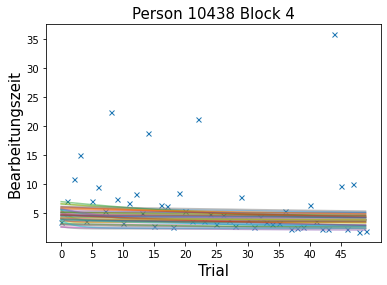

In [9]:
for vp_code in vp_codes:
#     fig, ax = plt.subplots(ncols=4, sharey=True)
#     fig.set_size_inches(20, 5)
    
    
    for block in range(1, 5):
        fn = f'../data/{vp_code}/block_{block}_experiment_data.csv'
        with open(fn) as df:
            raw_data = df.readlines()

        D = pd.DataFrame([line.replace('\t\t\t', '\t').replace('\t\t', '\t').replace('\n', '').split('\t') for line in open(fn)][3:])
        D.columns = ['trial', 'condition', 'time']

        D.loc[:, 'time'] = D.loc[:, 'time'].apply(float)
        

        plt.plot(D.trial, D.time, 'x', markersize=5)
        plt.ylabel("Bearbeitungszeit",fontsize=15)
        plt.xlabel("Trial",fontsize=15)
        plt.xticks(np.arange(0, 49, 5.0))
        plt.title(f"Person {vp_code} Block {block}",fontsize=15)


        try:
            for i in range(50):
                r = random.randint(0, 1500)
                a = all_samples[f"{vp_code}_{block}"]['a'][r]
                b = all_samples[f"{vp_code}_{block}"]['b'][r]
                c = all_samples[f"{vp_code}_{block}"]['c'][r]
                s = all_samples[f"{vp_code}_{block}"]['sigma'][r]
                plt.plot(range(50), b*torch.exp(-a*torch.arange(50))+c, alpha=0.5)
        except IndexError:
            continue
        plt.savefig(f"../Diagrams and Tables/Trial Duration/{vp_code}_{block}.jpg")
        plt.show()
        #plt.savefig(f"../Diagrams and Tables/Trial Duration/{vp_code}_{block}.jpg")
        

In [1]:
blocks = ['Block 1', 'Block 2', 'Block 3', 'Block 4']
a, b, c, d, e, f = 0, 0, 0, 0, 0, 0
sig_diff_list = []
q = 0
z = 0
fig,axs = plt.subplots(2, 8, figsize=(80,20))
for vp_code in vp_codes:
    block_1 = []
    block_2 = []
    block_3 = []
    block_4 = []
    
    block_1  = block_1 + [np.mean(((all_samples[f'{vp_code}_1']['a']-all_samples[f'{vp_code}_1']['a']) > 0).numpy())] + [np.mean(((all_samples[f'{vp_code}_2']['a']-all_samples[f'{vp_code}_1']['a']) > 0).numpy())] + [np.mean(((all_samples[f'{vp_code}_3']['a']-all_samples[f'{vp_code}_1']['a']) > 0).numpy())] + [np.mean(((all_samples[f'{vp_code}_4']['a']-all_samples[f'{vp_code}_1']['a']) > 0).numpy())]
    block_2  = block_2 + [np.mean(((all_samples[f'{vp_code}_1']['a']-all_samples[f'{vp_code}_2']['a']) > 0).numpy())] + [np.mean(((all_samples[f'{vp_code}_2']['a']-all_samples[f'{vp_code}_2']['a']) > 0).numpy())] + [np.mean(((all_samples[f'{vp_code}_3']['a']-all_samples[f'{vp_code}_2']['a']) > 0).numpy())] + [np.mean(((all_samples[f'{vp_code}_4']['a']-all_samples[f'{vp_code}_2']['a']) > 0).numpy())]
    block_3  = block_3 + [np.mean(((all_samples[f'{vp_code}_1']['a']-all_samples[f'{vp_code}_3']['a']) > 0).numpy())] + [np.mean(((all_samples[f'{vp_code}_2']['a']-all_samples[f'{vp_code}_3']['a']) > 0).numpy())] + [np.mean(((all_samples[f'{vp_code}_3']['a']-all_samples[f'{vp_code}_3']['a']) > 0).numpy())] + [np.mean(((all_samples[f'{vp_code}_4']['a']-all_samples[f'{vp_code}_3']['a']) > 0).numpy())]
    block_4  = block_4 + [np.mean(((all_samples[f'{vp_code}_1']['a']-all_samples[f'{vp_code}_4']['a']) > 0).numpy())] + [np.mean(((all_samples[f'{vp_code}_2']['a']-all_samples[f'{vp_code}_4']['a']) > 0).numpy())] + [np.mean(((all_samples[f'{vp_code}_3']['a']-all_samples[f'{vp_code}_4']['a']) > 0).numpy())] + [np.mean(((all_samples[f'{vp_code}_4']['a']-all_samples[f'{vp_code}_4']['a']) > 0).numpy())]          
    for i in block_1:
        if i > 0.7 or i < 0.3:
            if block_1.index(i) == 1:
                axs[0, q].hist((all_samples[f'{vp_code}_1']['a']).numpy(), fc=(1, 0, 0, 0.5))
                axs[0, q].hist((all_samples[f'{vp_code}_2']['a']).numpy(), fc=(0, 0, 1, 0.5))
                axs[0, q].set_title(f'Vergleich von Block 1 und Block 2 bei Person {vp_code}', fontsize=15)
                axs[0, q].set_xlabel("Wert von a", fontsize=15)
                axs[0, q].set_ylabel("Häufigekit von a", fontsize=15)
                sig_diff_list = sig_diff_list + [f'{vp_code}_Block 1 und Block 2']
                a = a + 1
                q = q + 1
            if block_1.index(i) == 2:
                axs[0, q].hist((all_samples[f'{vp_code}_1']['a']).numpy(), fc=(1, 0, 0, 0.5))
                axs[0, q].hist((all_samples[f'{vp_code}_3']['a']).numpy(), fc=(1, 1, 0, 0.5))
                axs[0, q].set_title(f'Vergleich von Block 1 und Block 3 bei Person {vp_code}', fontsize=15)
                axs[0, q].set_xlabel("Wert von a", fontsize=15)
                axs[0, q].set_ylabel("Häufigekit von a", fontsize=15)
                sig_diff_list = sig_diff_list + [f'{vp_code}_Block 1 und Block 3']
                b = b + 1
                q = q + 1
            if block_1.index(i) == 3:
                axs[0, q].hist((all_samples[f'{vp_code}_1']['a']).numpy(), fc=(1, 0, 0, 0.5))
                axs[0, q].hist((all_samples[f'{vp_code}_4']['a']).numpy(), fc=(0, 1, 0, 0.5))
                axs[0, q].set_title(f'Vergleich von Block 1 und Block 4 bei Person {vp_code}', fontsize=15)
                axs[0, q].set_xlabel("Wert von a", fontsize=15)
                axs[0, q].set_ylabel("Häufigekit von a", fontsize=15)
                sig_diff_list = sig_diff_list + [f'{vp_code}_Block 1 und Block 4']
                c = c + 1
                q = q + 1
    for i in block_2:
        if i > 0.7 or i < 0.3:
            if block_2.index(i) == 2:
                axs[1, z].hist((all_samples[f'{vp_code}_2']['a']).numpy(), fc=(0, 0, 1, 0.5))
                axs[1, z].hist((all_samples[f'{vp_code}_3']['a']).numpy(), fc=(1, 1, 0, 0.5))
                axs[1, z].set_title(f'Vergleich von Block 2 und Block 3 bei Person {vp_code}', fontsize=15)
                axs[1, z].set_xlabel("Wert von a", fontsize=15)
                axs[1, z].set_ylabel("Häufigekit von a", fontsize=15)
                sig_diff_list = sig_diff_list + [f'{vp_code}_Block 2 und Block 3']
                d = d + 1
                z = z + 1
            if block_2.index(i) == 3:
                axs[1, z].hist((all_samples[f'{vp_code}_2']['a']).numpy(), fc=(0, 0, 1, 0.5))
                axs[1, z].hist((all_samples[f'{vp_code}_4']['a']).numpy(), fc=(0, 1, 0, 0.5))
                axs[1, z].set_title(f'Vergleich von Block 2 und Block 4 bei Person {vp_code}', fontsize=15)
                axs[1, z].set_xlabel("Wert von a", fontsize=15)
                axs[1, z].set_ylabel("Häufigekit von a", fontsize=15)
                sig_diff_list = sig_diff_list + [f'{vp_code}_Block 2 und Block 4']
                e = e + 1
                z = z + 1
    for i in block_3:
        if i > 0.7 or i < 0.3:
            if block_3.index(i) == 3:
                axs[1, z].hist((all_samples[f'{vp_code}_3']['a']).numpy(), fc=(1, 1, 0, 0.5))
                axs[1, z].hist((all_samples[f'{vp_code}_4']['a']).numpy(), fc=(0, 1, 0, 0.5))
                axs[1, z].set_title(f'Vergleich von Block 3 und Block 4 bei Person {vp_code}', fontsize=15)
                axs[1, z].set_xlabel("Wert von a", fontsize=15)
                axs[1, z].set_ylabel("Häufigekit von a", fontsize=15)
                sig_diff_list = sig_diff_list + [f'{vp_code}_Block 3 und Block 4']
                f = f + 1
                z = z + 1
    
    data = {'Blocks': blocks,
            'Block 1': block_1,
            'Block 2': block_2,
            'Block 3': block_3,
            'Block 4': block_4}
    df = pd.DataFrame (data, columns = ['Blocks','Block 1','Block 2', 'Block 3', 'Block 4'])
    print (df)
    df.to_csv(f"../Diagrams and Tables/Trial Duration/{vp_code}/Block_Comparison_new.csv")

plt.savefig(f"../Diagrams and Tables/Trial Duration/Histograms_1.pdf")
print("Difference between block 1 and block 2: "+str(a)+" times")
print("Difference between block 1 and block 3: "+str(b)+" times")
print("Difference between block 1 and block 4: "+str(c)+" times")
print("Difference between block 2 and block 3: "+str(d)+" times")
print("Difference between block 2 and block 4: "+str(e)+" times")
print("Difference between block 3 and block 4: "+str(f)+" times")
print("From a Total of "+str(48*6)+" possible differences")
for i in sig_diff_list:
    print("Difference in "+i)

NameError: name 'plt' is not defined

In [70]:
np.mean()
matplotlib.rcParams["..."] = [-5, 3]

TypeError: _mean_dispatcher() missing 1 required positional argument: 'a'

stat=0.405, p=0.000
Probably not Gaussian
stat=0.775, p=0.000
Probably not Gaussian
stat=0.435, p=0.000
Probably not Gaussian
stat=0.689, p=0.000
Probably not Gaussian
stat=0.677, p=0.000
Probably not Gaussian
stat=0.841, p=0.000
Probably not Gaussian
stat=0.568, p=0.000
Probably not Gaussian
stat=0.798, p=0.000
Probably not Gaussian
stat=0.215, p=0.000
Probably not Gaussian
stat=0.435, p=0.000
Probably not Gaussian
stat=0.332, p=0.000
Probably not Gaussian
stat=0.411, p=0.000
Probably not Gaussian
stat=0.764, p=0.000
Probably not Gaussian
stat=0.618, p=0.000
Probably not Gaussian
stat=0.834, p=0.000
Probably not Gaussian
stat=0.708, p=0.000
Probably not Gaussian
stat=0.838, p=0.000
Probably not Gaussian
stat=0.509, p=0.000
Probably not Gaussian
stat=0.531, p=0.000
Probably not Gaussian
stat=0.505, p=0.000
Probably not Gaussian
stat=0.656, p=0.000
Probably not Gaussian
stat=0.594, p=0.000
Probably not Gaussian
stat=0.534, p=0.000
Probably not Gaussian
stat=0.891, p=0.000
Probably not G

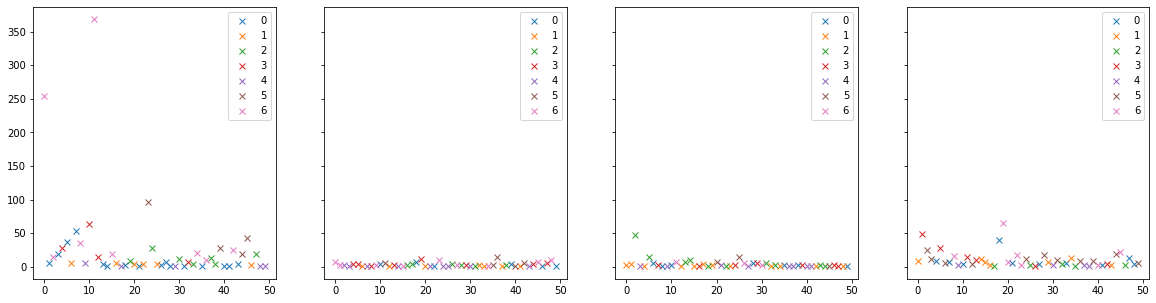

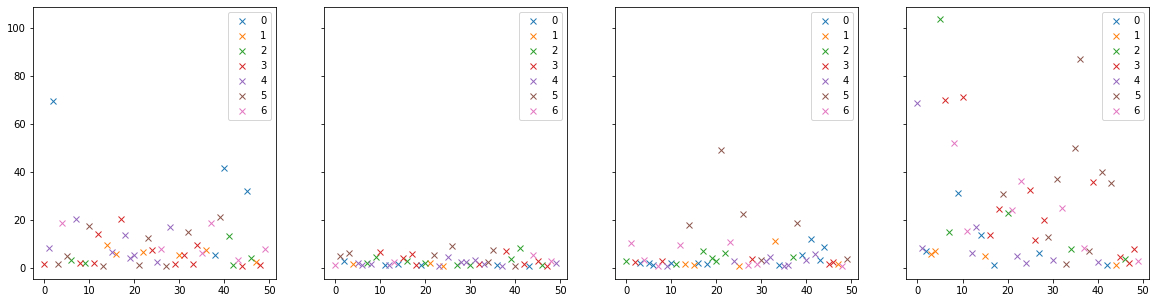

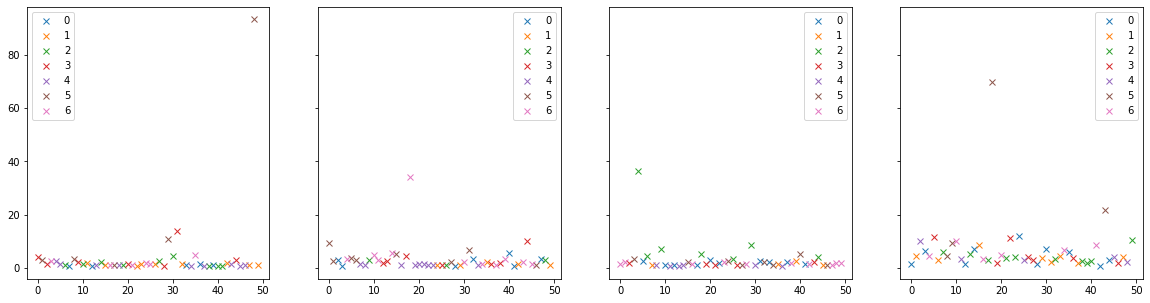

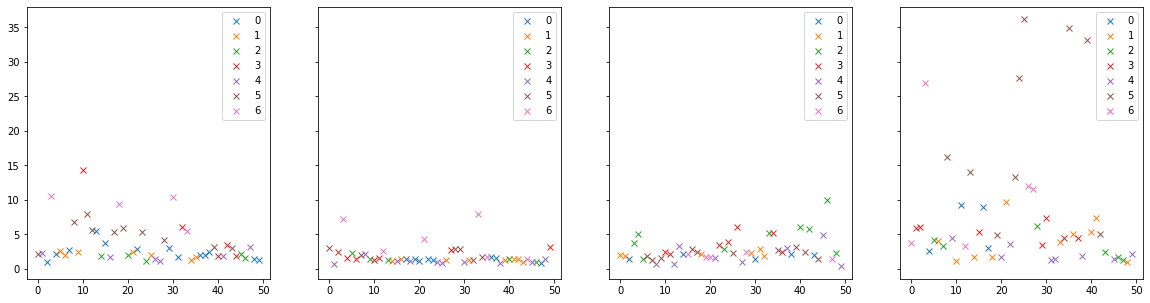

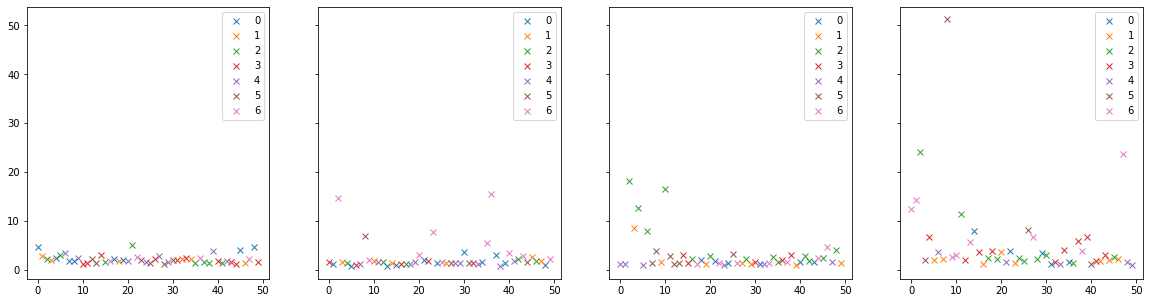

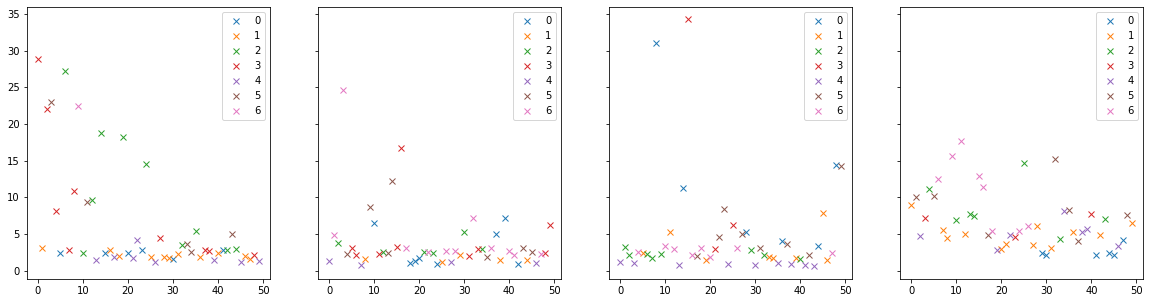

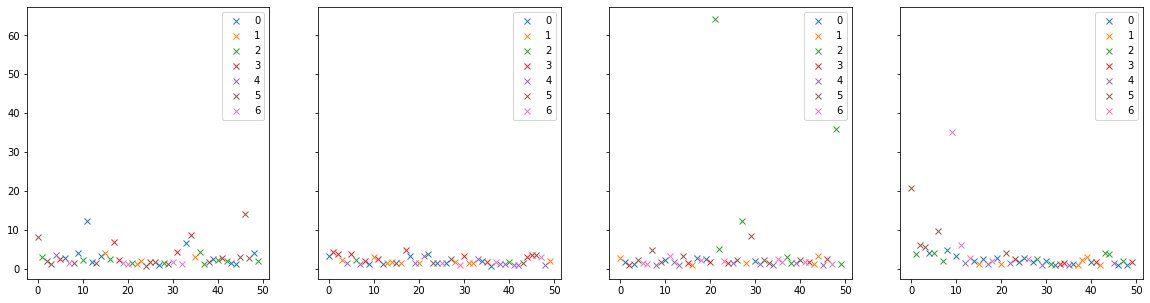

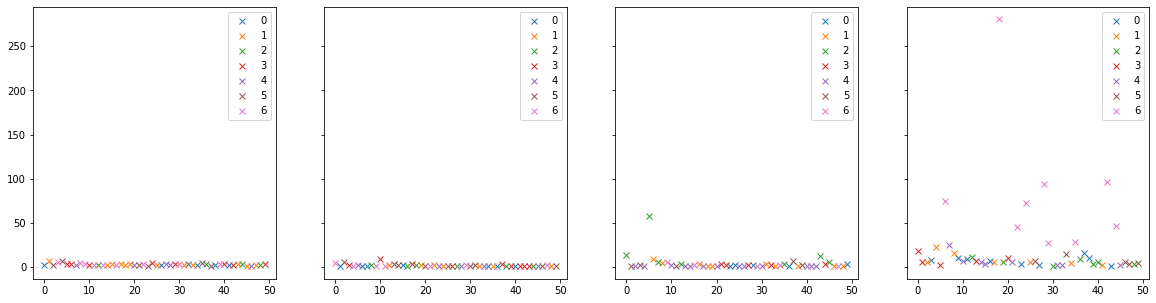

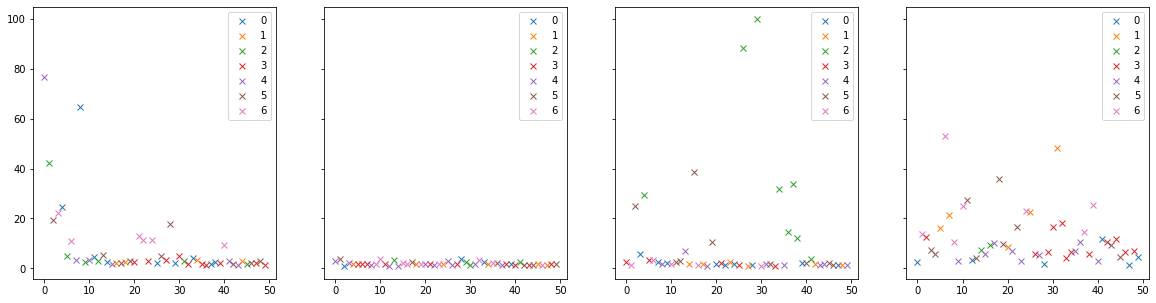

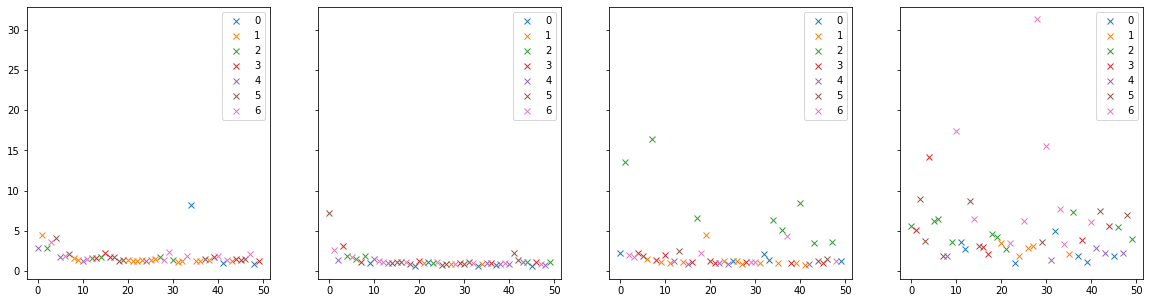

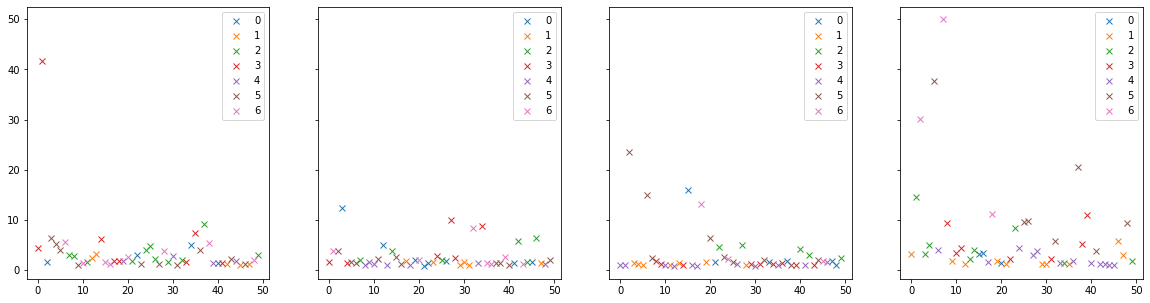

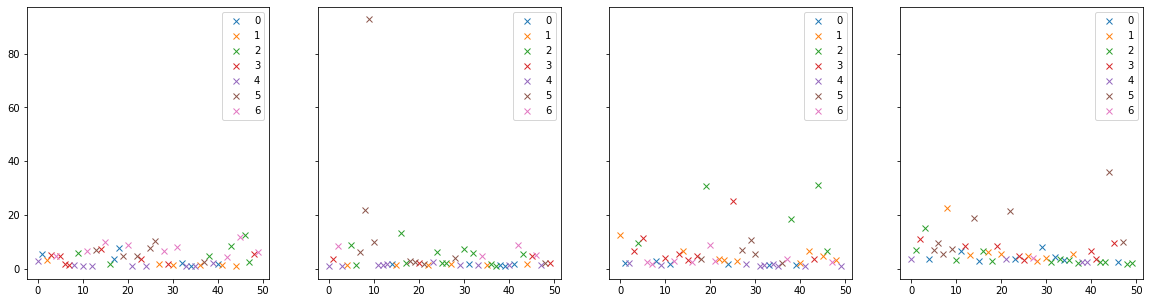

In [2]:
vp_codes = [1234, 1313, 1735, 5724, 7127, 7575, 7660, 7811, 8638, 9436, 9933, 10438]
time_dictionary = {}
time_condition_dictionary = {}
for vp_code in vp_codes:
    block = 1
    fig, ax = plt.subplots(ncols=4, sharey=True)
    fig.set_size_inches(20, 5)

    for block in range(1, 5):
        fn = f'../data/{vp_code}/block_{block}_experiment_data.csv'
        with open(fn) as df:
            raw_data = df.readlines()

        D = pd.DataFrame([line.replace('\t\t\t', '\t').replace('\t\t', '\t').replace('\n', '').split('\t') for line in open(fn)][3:])
        D.columns = ['trial', 'condition', 'time']


        D.loc[:, 'time'] = D.loc[:, 'time'].apply(float)
        D.loc[:, 'trial'] = D.loc[:, 'trial'].apply(int)
        D.loc[:, 'condition'] = D.loc[:, 'condition'].apply(int)
        
        
        key_a = "Time_"+str(vp_code)+"_"+str(block)
        value_a = D.time
        a = {key_a:value_a}
        
        time_dictionary.update(a)
        
        for cond, d in D.groupby('condition'):
            key_b = "Time_"+str(vp_code)+"_"+str(block)+"_"+str(cond)
            value_b = d.time
            b = {key_b:value_b}
            time_condition_dictionary.update(b)
        
        #print ('VP_Code '+str(vp_code)+' Block '+str(block)+' mean = ' + str(np.mean(D.time)))
        #print ('VP_Code '+str(vp_code)+' Block '+str(block)+' var = ' + str(np.var(D.time)))
        #print ('VP_Code '+str(vp_code)+' Block '+str(block)+' std = ' + str(np.std(D.time)))
        data = D.time
        
        
        #https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/
        stat, p = shapiro(data)
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Probably Gaussian')
        else:
            print('Probably not Gaussian')
            
            
        #for cond, d in D.groupby('condition'):
            #print('Mean of Condition ' + str(cond) + ' = ' + str(np.mean(d.time)))
        
        
        for cond, d in D.groupby('condition'):
            ax[block-1].plot(d.trial, d.time, 'x', label=cond)
        ax[block-1].legend()
        # ax[block-1].plot(D.trial, D.time, 'x')
        
        
#print(time_dictionary)
#print(time_condition_dictionary)

time_block_1 = []
for vp_code in vp_codes:
    time_block_1.append(time_dictionary["Time_"+str(vp_code)+"_1"])
time_block_2 = []
for vp_code in vp_codes:
    time_block_2.append(time_dictionary["Time_"+str(vp_code)+"_2"])
time_block_3 = []
for vp_code in vp_codes:
    time_block_3.append(time_dictionary["Time_"+str(vp_code)+"_3"])
time_block_4 = []
for vp_code in vp_codes:
    time_block_4.append(time_dictionary["Time_"+str(vp_code)+"_4"])

    
# stat, p = friedmanchisquare(time_block_1, time_block_2, time_block_3, time_block_4)
# print('stat=%.3f, p=%.3f' % (stat, p))
# if p > 0.05:
#     print('Probably the same distribution')
# else:
#     print('Probably different distributions')
# result = scikit_posthocs.posthoc_nemenyi_friedman()

In [3]:
import pyro
from pyro import sample
import pyro.distributions as dist
import torch

In [4]:
def exp_model(t):
    a = sample('a', dist.HalfNormal(1)) # set slope prior
    b = sample('b', dist.HalfNormal(1)) # set scale prior
    c = sample('c', dist.HalfNormal(1)) # set bias prior
    shape = b * torch.exp(-a*t) + c
    rate = sample('sigma', dist.Exponential(1))
    rt = sample('rt', dist.Normal(shape, rate))
    return rt
    #torch.exp(-t)

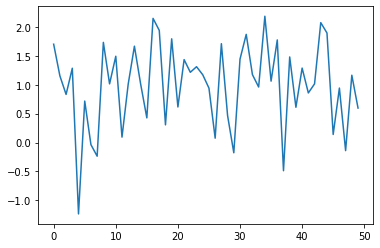

In [5]:
t = torch.tensor(range(50))
rt = exp_model(t)
plt.plot(t, rt)

In [6]:
from pyro.infer import MCMC, NUTS
from pyro import condition

In [7]:
# exp_conditioned = condition(exp_model, data={'rt': torch.tensor(D.time)})
# kernel = NUTS(exp_conditioned)
# n_samples = 1500
# mcmc = MCMC(kernel, num_samples=n_samples)
# mcmc.run(torch.arange(50))
# samples = mcmc.get_samples()
# mcmc.summary()

In [8]:
import random

In [9]:
# plt.plot(D.trial, D.time, 'x')
# for i in range(50):
#     r = random.randint(0, 1500)
#     a = samples['a'][r]
#     b = samples['b'][r]
#     c = samples['c'][r]
#     s = samples['sigma'][r]
#     plt.plot(range(50), b*torch.exp(a*torch.arange(50))+c, alpha=0.5)

Warmup:  18%|█▊        | 533/3000 [00:22, 35.72it/s, step size=5.41e-01, acc. prob=0.788]

KeyboardInterrupt: 

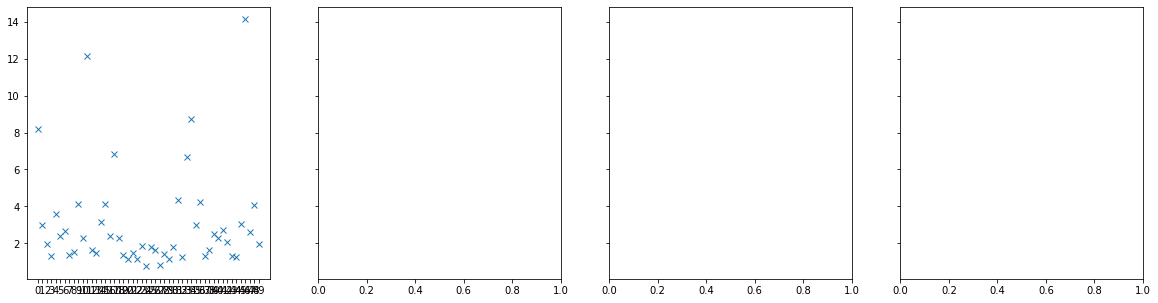

Warmup:  18%|█▊        | 535/3000 [00:40, 35.72it/s, step size=5.31e-01, acc. prob=0.788]

In [10]:
fig, ax = plt.subplots(ncols=4, sharey=True)
fig.set_size_inches(20, 5)
for block in range(1, 5):
    fn = f'../data/7660/block_{block}_experiment_data.csv'
    with open(fn) as df:
        raw_data = df.readlines()

    D = pd.DataFrame([line.replace('\t\t\t', '\t').replace('\t\t', '\t').replace('\n', '').split('\t') for line in open(fn)][3:])
    D.columns = ['trial', 'condition', 'time']

    D.loc[:, 'time'] = D.loc[:, 'time'].apply(float)

    ax[block-1].plot(D.trial, D.time, 'x')
    
    exp_conditioned = condition(exp_model, data={'rt': torch.tensor(D.time)})
    kernel = NUTS(exp_conditioned)
    n_samples = 1500
    mcmc = MCMC(kernel, num_samples=n_samples)
    mcmc.run(torch.arange(50))
    samples = mcmc.get_samples()
    mcmc.summary()
    for i in range(50):
        r = random.randint(0, 1500)
        a = samples['a'][r]
        b = samples['b'][r]
        c = samples['c'][r]
        s = samples['sigma'][r]
        ax[block-1].plot(range(50), b*torch.exp(-a*torch.arange(50))+c, alpha=0.5)